# Multiple Linear Regression

In [1]:
import copy
import numpy as np
import matplotlib.pyplot as plt

### Training Data Initialization
In this section, the training data for a machine learning model is initialized. The input features are stored in the array `X_train_data`, and the corresponding output labels are stored in the array `y_train_labels`.

In [2]:
# Initialize training data for a machine learning model
X_train_data = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train_labels = np.array([460, 232, 178])

### Parameters Initialization
Here, the initial bias (`initial_bias`) and initial weight (`initial_weight`) parameters for a machine learning model are set with specific values.

In [3]:
# Initialize parameters
initial_bias = 785.1811367994083
initial_weight = np.array([0.39133535, 18.75376741, -53.36032453, -26.42131618])

### Prediction Function (Single Loop)
The function `predict_single_loop` predicts the output of a linear regression model for a single data point using a loop. It takes input features, weight, and bias as parameters and returns the predicted output.

In [4]:
def predict_single_loop(input_features, weight, bias):
    """
    Predict the output of a linear regression model for a single data point using a loop.

    Parameters:
    - input_features: Input features as a NumPy array.
    - weight: Weight parameter of the linear regression model.
    - bias: Bias parameter of the linear regression model.

    Returns:
    - prediction: Predicted output for the given input features.
    """
    n = input_features.shape[0]
    prediction = 0

    # Calculate the weighted sum of input features
    for i in range(n):
        p_i = weight[i] * input_features[i]
        prediction += p_i

    # Add bias to the weighted sum
    prediction += bias
    return prediction

### Extract First Row of Training Data
In this section, the first row of the training data (`x_first_row`) is extracted from the array `X_train_data`.

In [5]:
# Extract the first row of training data
x_first_row = X_train_data[0]

### Prediction for First Row
The code predicts the output for the first row of the training data using the initialized parameters (`initial_weight` and `initial_bias`). The result is stored in the variable `prediction_result`.

In [6]:
# Predict the output for the first row using the initialized parameters
prediction_result = predict_single_loop(x_first_row, initial_weight, initial_bias)
prediction_result

459.9999976194083

### Prediction Function (Dot Product)
The function `predict_single_dot` predicts the output of a linear regression model for a single data point using dot product. It takes input features, weight, and bias as parameters and returns the predicted output.

In [7]:
def predict_single_dot(input_features, weight, bias):
    """
    Predict the output of a linear regression model for a single data point using dot product.

    Parameters:
    - input_features: Input features as a NumPy array.
    - weight: Weight parameter of the linear regression model.
    - bias: Bias parameter of the linear regression model.

    Returns:
    - prediction: Predicted output for the given input features.
    """
    f_wb = input_features.dot(weight)
    f_wb += bias
    return f_wb

### Prediction for First Row (Dot Product)
The code predicts the output for the first row of the training data using dot product, utilizing the initialized parameters (`initial_weight` and `initial_bias`). The result is stored in the variable `prediction_result_dot`.

In [8]:
# Predict the output for the first row using dot product
prediction_result_dot = predict_single_dot(x_first_row, initial_weight, initial_bias)
prediction_result_dot

459.9999976194083

### Cost Computation Function (Matrix)
The function `compute_cost_matrix` calculates the mean squared error cost for a linear regression model using dot product. It takes input features matrix (`X`), output labels (`y`), weight, and bias as parameters and returns the computed cost.

<p align="center">
    <img src="0_cost_multiple.png" alt="Linear Regression Cost" />
</p>

In [9]:
def compute_cost_matrix(X, y, weight, bias):
    """
    Compute the mean squared error cost for a linear regression model using dot product.

    Parameters:
    - X: Input features matrix as a NumPy array.
    - y: Output labels as a NumPy array.
    - weight: Weight parameter of the linear regression model.
    - bias: Bias parameter of the linear regression model.

    Returns:
    - cost: Mean squared error cost.
    """
    m = X.shape[0]
    cost = 0.0

    # Calculate the total squared error using dot product
    for i in range(m):
        f_wb_i = np.dot(X[i], weight) + bias
        cost += ((f_wb_i - y[i]) ** 2)

    # Calculate the mean squared error
    cost *= (1 / (2 * m))
    return cost

### Compute Cost using Dot Product
The code computes the mean squared error cost for a linear regression model using dot product. The parameters (`initial_weight` and `initial_bias`) are applied to the training data (`X_train_data` and `y_train_labels`). The result is stored in the variable `computed_cost`.

In [10]:
# Compute the cost using dot product
computed_cost = compute_cost_matrix(X_train_data, y_train_labels, initial_weight, initial_bias)
computed_cost

1.5578904045996674e-12

### Gradient Computation Function (Matrix)
The function `compute_gradient_matrix` calculates the gradient of the cost function with respect to weight and bias using dot product. It takes input features matrix (`X`), output labels (`y`), weight, and bias as parameters and returns the computed gradients.

<p align="center">
    <img src="1_gradient_multiple.png" alt="Linear Regression Cost" />
</p>

In [11]:
def compute_gradient_matrix(X, y, weight, bias):
    """
    Compute the gradient of the cost function with respect to weight and bias using dot product.

    Parameters:
    - X: Input features matrix as a NumPy array.
    - y: Output labels as a NumPy array.
    - weight: Weight parameter of the linear regression model.
    - bias: Bias parameter of the linear regression model.

    Returns:
    - dj_dw: Gradient with respect to weight.
    - dj_db: Gradient with respect to bias.
    """
    m, n = X.shape
    dj_dw = np.zeros((n))
    dj_db = 0.0

    # Calculate gradients using dot product
    for i in range(m):
        err = (np.dot(X[i], weight) + bias) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * X[i, j]
        dj_db = dj_db + err

    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_db, dj_dw

### Compute Gradients using Dot Product
The code computes the gradients of the cost function with respect to weight and bias using dot product. The parameters (`initial_weight` and `initial_bias`) are applied to the training data (`X_train_data` and `y_train_labels`). The results are printed as `temp_dj_db` and `temp_dj_dw`.

In [12]:
# Compute gradients using dot product
temp_dj_db, temp_dj_dw = compute_gradient_matrix(X_train_data, y_train_labels, initial_weight, initial_bias)
print(temp_dj_db, temp_dj_dw)

-1.6739251122999121e-06 [-2.72623574e-03 -6.27197255e-06 -2.21745574e-06 -6.92403377e-05]


### Gradient Descent Optimization (Matrix)
The function `gradient_descent_matrix` performs gradient descent optimization to update the parameters of a linear regression model using dot product. It takes input features matrix (`X`), output labels (`y`), initial weight, initial bias, cost function, gradient function, learning rate, and number of iterations as parameters. The updated weight, bias, and cost history are returned.

<p align="center">
    <img src="2_weight_updation_multiple.png" alt="Linear Regression Cost" />
</p>

In [13]:
def gradient_descent_matrix(X, y, initial_weight, initial_bias, cost_function, gradient_function, learning_rate, num_iterations):
    """
    Perform gradient descent optimization to update model parameters using dot product.

    Parameters:
    - X: Input features matrix as a NumPy array.
    - y: Output labels as a NumPy array.
    - initial_weight: Initial weight parameter of the linear regression model.
    - initial_bias: Initial bias parameter of the linear regression model.
    - cost_function: Cost function to be minimized.
    - gradient_function: Function to compute the gradient of the cost function.
    - learning_rate: The learning rate for gradient descent.
    - num_iterations: Number of iterations for gradient descent.

    Returns:
    - updated_weight: Updated weight parameter.
    - updated_bias: Updated bias parameter.
    - cost_history: List containing the cost at each iteration.
    """
    cost_history = []
    weight = copy.deepcopy(initial_weight)
    bias = initial_bias

    for i in range(num_iterations):
        dj_db, dj_dw = gradient_function(X, y, weight, bias)
        weight = weight - learning_rate * dj_dw
        bias = bias - learning_rate * dj_db

        cost_history.append(cost_function(X, y, weight, bias))

        # Display progress every 100 iterations
        if i % 100 == 0:
            print(f"Iteration: {i}, Loss: {cost_history[-1]}")

    return weight, bias, cost_history

### Gradient Descent Execution (Matrix)
Here, gradient descent is applied to update the parameters of a linear regression model using dot product. The initial weights (`initial_weights`) and bias (`initial_bias`) are set to zero. The optimization runs for 1000 iterations with a learning rate of 5.0e-7. The final parameters, including bias and weights, are displayed along with predictions and target values for each data point.

In [15]:
# Initialize parameters
initial_weights = np.zeros_like(initial_weight)
initial_bias = 0.0

# Gradient descent settings
num_iterations = 1000
learning_rate = 5.0e-7

# Run gradient descent using dot product
final_weights, final_bias, cost_history = gradient_descent_matrix(X_train_data, y_train_labels, initial_weights, initial_bias, compute_cost_matrix, compute_gradient_matrix, learning_rate, num_iterations)

print(f"\nGradient Descent: Bias: {final_bias:0.2f},   Weights: {final_weights} \n")

m, _ = X_train_data.shape
for i in range(m):
    print(f"Prediction: {np.dot(X_train_data[i], final_weights) + final_bias:0.2f}, Target Value: {y_train_labels[i]}")

Iteration: 0, Loss: 2529.46295223163
Iteration: 100, Loss: 695.9903158352028
Iteration: 200, Loss: 694.9206979323058
Iteration: 300, Loss: 693.8604297851191
Iteration: 400, Loss: 692.8094286135915
Iteration: 500, Loss: 691.7676123706057
Iteration: 600, Loss: 690.7348997354993
Iteration: 700, Loss: 689.7112101076165
Iteration: 800, Loss: 688.6964635999458
Iteration: 900, Loss: 687.6905810327936

Gradient Descent: Bias: -0.00,   Weights: [ 0.20396569  0.00374919 -0.0112487  -0.0658614 ] 

Prediction: 426.19, Target Value: 460
Prediction: 286.17, Target Value: 232
Prediction: 171.47, Target Value: 178


### Cost Visualization
The code generates two plots to visualize the cost versus iteration during the gradient descent optimization using dot product. The left plot displays the entire history, while the right plot focuses on the tail of the iteration steps. This helps in observing the convergence behavior of the optimization process.

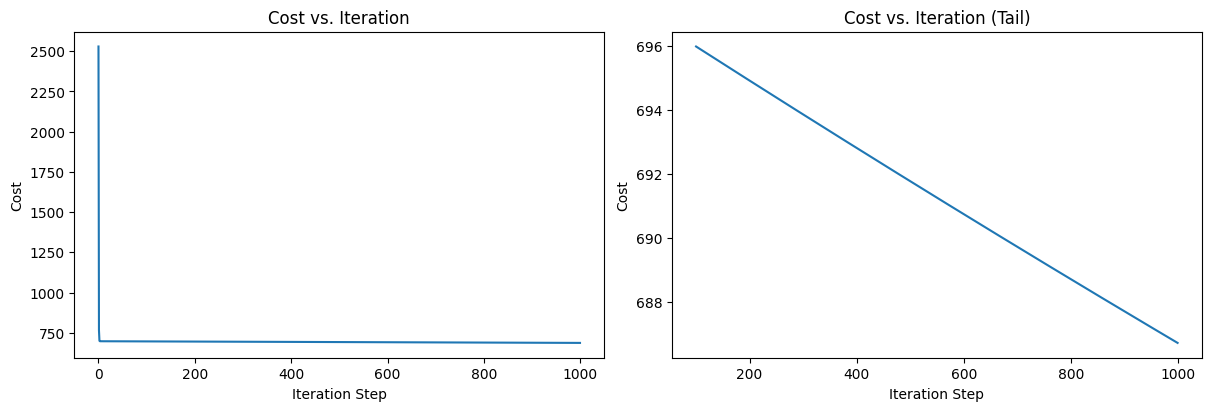

In [16]:
# Plot cost versus iteration
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(cost_history)
ax2.plot(100 + np.arange(len(cost_history[100:])), cost_history[100:])
ax1.set_title("Cost vs. Iteration")
ax2.set_title("Cost vs. Iteration (Tail)")
ax1.set_ylabel('Cost')
ax2.set_ylabel('Cost')
ax1.set_xlabel('Iteration Step')
ax2.set_xlabel('Iteration Step')
plt.show()

### Feature Normalization Function (Matrix)
The function `normalize_features_matrix` normalizes features in a matrix by subtracting the mean and dividing by the standard deviation. It takes an input features matrix (`X`) and returns the normalized features matrix (`normalized_X`).

In [17]:
def normalize_features_matrix(X):
    """
    Normalize features in a matrix by subtracting mean and dividing by standard deviation.

    Parameters:
    - X: Input features matrix as a NumPy array.

    Returns:
    - normalized_X: Normalized features matrix.
    """
    means = np.mean(X, axis=0)
    stds = np.std(X, axis=0)

    epsilon = 1e-8
    stds[stds < epsilon] = epsilon

    normalized_X = (X - means) / stds

    return normalized_X

### Feature Normalization (Matrix)
In this section, the features in the training data (`X_train_scaled`) are normalized using the `normalize_features_matrix` function.

In [18]:
# Normalize features in the training data
X_train_scaled = normalize_features_matrix(X_train_data)

### Gradient Descent Execution with Normalized Features (Matrix)
Here, gradient descent is applied to update the parameters of a linear regression model using normalized features. The initial weights (`initial_weights_normalized`) and bias (`initial_bias_normalized`) are set to zero. The optimization runs for 1000 iterations with a learning rate of 0.01. The final parameters, including bias and weights, are displayed along with predictions and target values for each data point.

In [21]:
# Initialize parameters
initial_weights_normalized = np.zeros_like(initial_weight)
initial_bias_normalized = 0.0

# Gradient descent settings
num_iterations_normalized = 1000
learning_rate_normalized = 0.01

# Run gradient descent on normalized features
final_weights_normalized, final_bias_normalized, cost_history_normalized = gradient_descent_matrix(X_train_scaled, y_train_labels, initial_weights_normalized, initial_bias_normalized, compute_cost_matrix, compute_gradient_matrix, learning_rate_normalized, num_iterations_normalized)

print(f"\nGradient Descent (Normalized Features): Bias: {final_bias_normalized:0.2f},   Weights: {final_weights_normalized} \n")

m, _ = X_train_data.shape
for i in range(m):
    print(f"Prediction: {np.dot(X_train_scaled[i], final_weights_normalized) + final_bias_normalized:0.2f}, Target Value: {y_train_labels[i]}")

Iteration: 0, Loss: 48254.77176163629
Iteration: 100, Loss: 5582.449635877936
Iteration: 200, Loss: 745.7966398649062
Iteration: 300, Loss: 99.90278945590845
Iteration: 400, Loss: 13.383073446502468
Iteration: 500, Loss: 1.7928151365063023
Iteration: 600, Loss: 0.24016858825984924
Iteration: 700, Loss: 0.032173471419421285
Iteration: 800, Loss: 0.004310033482954698
Iteration: 900, Loss: 0.0005773834781962354

Gradient Descent (Normalized Features): Bias: 289.99,   Weights: [ 38.05168398  41.54320558 -30.98791712  36.34190238] 

Prediction: 459.99, Target Value: 460
Prediction: 231.99, Target Value: 232
Prediction: 177.99, Target Value: 178


### Cost Visualization with Normalized Features (Matrix)
The code generates two plots to visualize the cost versus iteration during the gradient descent optimization with normalized features. The left plot displays the entire history, while the right plot focuses on the tail of the iteration steps. This helps in observing the convergence behavior of the optimization process with normalized features.

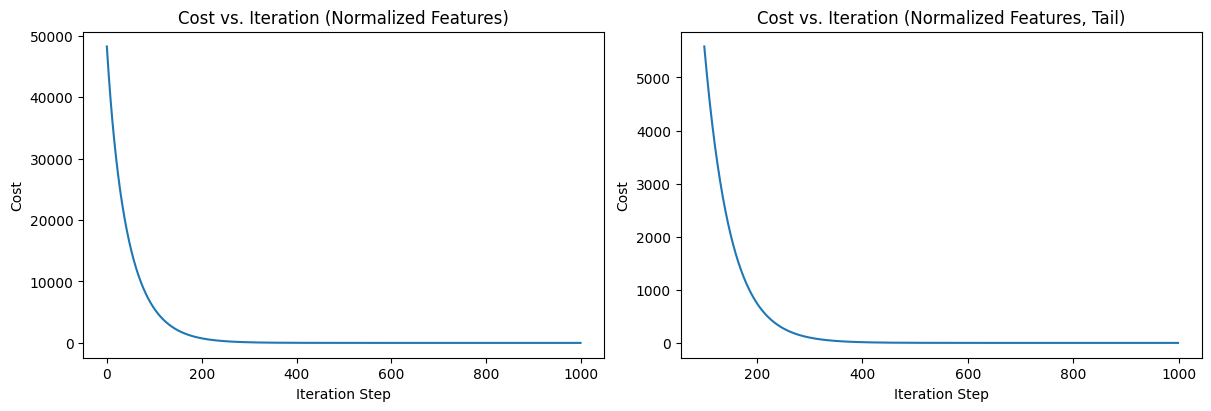

In [22]:
# Plot cost versus iteration for normalized features
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(cost_history_normalized)
ax2.plot(100 + np.arange(len(cost_history_normalized[100:])), cost_history_normalized[100:])
ax1.set_title("Cost vs. Iteration (Normalized Features)")
ax2.set_title("Cost vs. Iteration (Normalized Features, Tail)")
ax1.set_ylabel('Cost')
ax2.set_ylabel('Cost')
ax1.set_xlabel('Iteration Step')
ax2.set_xlabel('Iteration Step')
plt.show()